In [53]:
import numpy as np
import pandas as pd
from numpy import mean, std

from sklearn.metrics import accuracy_score as ac_score
from sklearn.metrics import confusion_matrix as conf_mat
from sklearn.metrics import classification_report as class_rep

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import array
import pickle

In [54]:
data = pd.read_csv('coffee_dataset.csv')

In [55]:
data.tail()

,MQ-2 Values,MQ-7 Values,MQ-135 Values,MQ-137 Values,is_not_barako
5275,353,285,376,228,1
5276,353,285,377,228,1
5277,353,285,377,228,1
5278,353,285,377,228,1
5279,353,284,377,228,1


In [56]:
cleaned = data.drop_duplicates(keep=False)

In [57]:
cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
MQ-2 Values,1349.0,361.863603,60.310515,151.0,330.0,356.0,418.0,450.0
MQ-7 Values,1349.0,172.562639,119.701520,50.0,68.0,104.0,312.0,376.0
MQ-135 Values,1349.0,377.157153,75.882331,140.0,336.0,391.0,435.0,488.0
MQ-137 Values,1349.0,196.441809,64.682853,57.0,149.0,192.0,253.0,310.0
is_not_barako,1349.0,0.484062,0.499931,0.0,0.0,0.0,1.0,1.0


In [58]:
cleaned.is_not_barako.value_counts()

0    696
1    653
Name: is_not_barako, dtype: int64

In [59]:
X = cleaned.drop(columns = ['is_not_barako']).values
y = cleaned.is_not_barako.values #1:barako; 0:not barako

In [60]:
lr = LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234, solver='sag')

### K-fold Validation

In [70]:
high_scores = []

for i in range(77):
    kfold = KFold(n_splits=i+2, random_state=49, shuffle=True)
    scores = cross_val_score(lr, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)
    print(f'number of splits: {i+2}\nhighest score: {np.max(scores)}\n')
    high_scores.append(np.max(scores))

print(np.max(high_scores))

number of splits: 2
highest score: 0.6237037037037036

number of splits: 3
highest score: 0.6266666666666667

number of splits: 4
highest score: 0.658753709198813

number of splits: 5
highest score: 0.6666666666666666

number of splits: 6
highest score: 0.6222222222222222

number of splits: 7
highest score: 0.6839378238341969

number of splits: 8
highest score: 0.6627218934911243

number of splits: 9
highest score: 0.6866666666666666

number of splits: 10
highest score: 0.6518518518518519

number of splits: 11
highest score: 0.6910569105691057

number of splits: 12
highest score: 0.6814159292035398

number of splits: 13
highest score: 0.6634615384615384

number of splits: 14
highest score: 0.7010309278350515

number of splits: 15
highest score: 0.6666666666666666

number of splits: 16
highest score: 0.7023809523809523

number of splits: 17
highest score: 0.725

number of splits: 18
highest score: 0.7466666666666667

number of splits: 19
highest score: 0.7183098591549296

number of spli

In [71]:
kfold = KFold(n_splits=77, random_state=49, shuffle=True)

In [72]:
scores = cross_val_score(lr, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)

In [75]:
print(scores)

print(np.argmax(scores)) #best fold

[0.61111111 0.77777778 0.61111111 0.66666667 0.55555556 0.38888889
 0.66666667 0.66666667 0.5        0.61111111 0.66666667 0.55555556
 0.61111111 0.72222222 0.44444444 0.66666667 0.77777778 0.55555556
 0.55555556 0.72222222 0.61111111 0.61111111 0.72222222 0.55555556
 0.66666667 0.83333333 0.77777778 0.55555556 0.72222222 0.55555556
 0.72222222 0.61111111 0.66666667 0.44444444 0.66666667 0.72222222
 0.55555556 0.66666667 0.66666667 0.55555556 0.52941176 0.52941176
 0.58823529 0.58823529 0.52941176 0.94117647 0.35294118 0.58823529
 0.58823529 0.70588235 0.58823529 0.58823529 0.52941176 0.47058824
 0.35294118 0.64705882 0.58823529 0.64705882 0.35294118 0.47058824
 0.64705882 0.52941176 0.58823529 0.70588235 0.52941176 0.70588235
 0.70588235 0.47058824 0.64705882 0.64705882 0.76470588 0.64705882
 0.70588235 0.58823529 0.47058824 0.52941176 0.70588235]
45


In [73]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.610 (0.109)


In [78]:
folds = []
gen = kfold.split(X)

for i in range(46):
    fold = next(gen)
    folds.append(fold)

print(folds[45])

best_fold = folds[45]

X_train, y_train = X[best_fold[0]], y[best_fold[0]]
X_test, y_test = X[best_fold[1]], y[best_fold[1]]

(array([   0,    1,    2, ..., 1346, 1347, 1348]), array([  65,  168,  346,  355,  379,  385,  407,  422,  463,  538,  747,
        960, 1050, 1140, 1177, 1184, 1226]))


In [79]:
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (1332, 4)
y_train shape: (1332,)
X_test shape: (17, 4)
y_test shape: (17,)


### Split Dataset

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

(1079, 4)

### Hyperparameter Tuning

In [80]:
param_grid_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced']                                    
}

In [81]:
from sklearn.model_selection import GridSearchCV
logModel_grid = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_grid_lr, verbose=1, cv=10, n_jobs=-1)
logModel_grid.fit(X_train, y_train)


print(logModel_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='saga')


C:\Users\alexi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Model Training

In [82]:
lr.fit(X_train, y_train)

C:\Users\alexi\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=20, random_state=1234,
                   solver='sag')

### Testing the model with the test set

In [84]:
pred = lr.predict(X_test)

In [85]:
score = ac_score(pred, y_test)
print(score)

0.9411764705882353


In [86]:
pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [87]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [88]:
X_test

array([[385,  73, 389, 174],
       [449, 121, 464, 238],
       [341,  57, 370, 174],
       [344,  59, 379, 178],
       [350,  66, 402, 186],
       [351,  68, 407, 188],
       [355,  80, 424, 193],
       [355,  88, 429, 192],
       [345, 113, 437, 198],
       [259,  60, 215,  92],
       [348,  68, 297, 121],
       [422, 318, 440, 274],
       [445, 355, 450, 302],
       [348, 319, 394, 256],
       [414, 355, 415, 285],
       [421, 354, 419, 290],
       [443, 368, 430, 310]], dtype=int64)

In [89]:
report = class_rep(y_test, pred)

In [91]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.86      1.00      0.92         6

    accuracy                           0.94        17
   macro avg       0.93      0.95      0.94        17
weighted avg       0.95      0.94      0.94        17



In [94]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 1A70-6F39

 Directory of C:\Users\alexi\Documents\College\thesis\enose_machine_learning

06/16/2022  08:14 PM    <DIR>          .
06/16/2022  08:14 PM    <DIR>          ..
06/10/2022  03:29 PM    <DIR>          .ipynb_checkpoints
06/10/2022  03:26 PM            43,546 Clustering.ipynb
06/16/2022  08:13 PM            84,280 coffee_data.xlsx
06/16/2022  03:51 PM            98,416 coffee_dataset.csv
06/16/2022  07:17 PM            45,667 coffee_dataset_lowTemp.csv
06/16/2022  08:09 PM             9,956 Confusion Matrix.png
06/16/2022  08:09 PM            45,855 enose_machine_learning.ipynb
06/12/2022  01:37 AM               744 eNose_model_4.sav
06/16/2022  04:56 PM             3,260 eNose_model_5.sav
06/16/2022  04:50 PM             3,260 eNose_model_dtc.sav
06/16/2022  08:14 PM    <DIR>          Gathered Data (E-Nose)
06/12/2022  09:55 AM    <DIR>          models
06/12/2022  09:55 AM    <DIR>          resources
06/10/2022  04:52

In [97]:
input_data = pd.read_csv('coffee_data.csv')

In [100]:
input_data.columns

Index(['MQ-2 Values', 'MQ-7 Values', 'MQ-135 Values', 'MQ-137 Values',
       'is_barako', 'is_not_barako'],
      dtype='object')

In [105]:
input_data_X = input_data.drop(columns=['is_barako', 'is_not_barako']).values
input_data_y = input_data.is_not_barako.values

In [108]:
lr_test_pred = lr.predict(input_data_X)

score = ac_score(lr_test_pred, input_data_y)
print(score)

0.5208333333333334


### Confusion Matrix

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

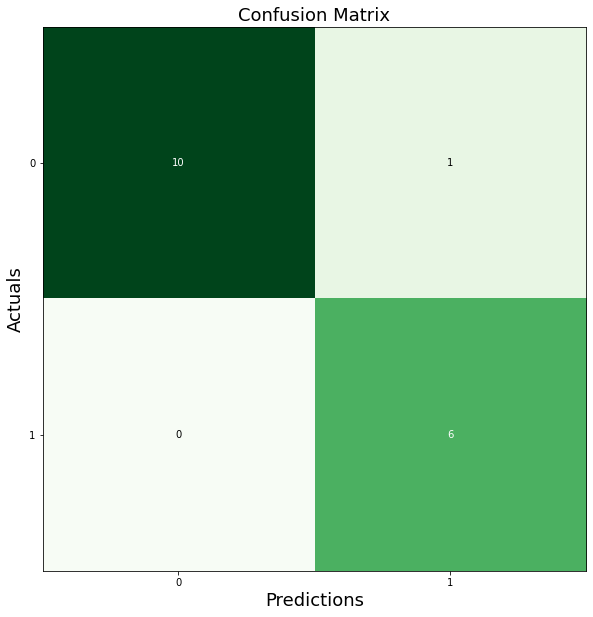

In [93]:
cm = conf_mat(y_test, pred)

fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(10, 10), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.savefig('Confusion Matrix.png')
plt.show()

In [303]:
print(lr.coef_, lr.intercept_)

[[ 0.02135866  0.00096821 -0.02234708 -0.00144088]] [1.09530481]


### Save the model

In [345]:
#save the model 
filename = 'eNose_model_5.sav'

In [346]:
pickle.dump(dtc, open(filename, 'wb'))

### Load the model